In [5]:
# Import Libraries
import pandas as pd
import constants
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
import joblib


In [6]:
# Change constants according to who is working with the ds
dn = pd.read_csv(constants.datasetmar_url)

In [7]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
dn['Start_Time'] = pd.to_datetime(dn['Start_Time'], format='ISO8601')
dn['End_Time'] = pd.to_datetime(dn['End_Time'], format='ISO8601')

# Extract date and hour components
dn['Start_Date'] = dn['Start_Time'].dt.date
dn['End_Date'] = dn['End_Time'].dt.date
dn['Start_Time_'] = dn['Start_Time'].dt.time
dn['End_Time_'] = dn['End_Time'].dt.time


In [9]:
pd.set_option('display.max_columns', None)
dn.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Date,End_Date,Start_Time_,End_Time_
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08,2016-02-08,05:46:00,11:00:00
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016-02-08,2016-02-08,06:07:59,06:37:59
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,2016-02-08,2016-02-08,06:49:27,07:19:27
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016-02-08,2016-02-08,07:23:34,07:53:34
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016-02-08,2016-02-08,07:39:07,08:09:07


In [10]:
dn.drop(['Start_Time', 'End_Time'], axis=1, inplace=True)

dn.rename(columns={'Start_Time_': 'Start_Time', 'End_Time_': 'End_Time'}, inplace=True)

pd.set_option('display.max_columns', None)
dn.head()


,ID,Source,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Date,End_Date,Start_Time,End_Time
0,A-1,Source2,3,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08,2016-02-08,05:46:00,11:00:00
1,A-2,Source2,2,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016-02-08,2016-02-08,06:07:59,06:37:59
2,A-3,Source2,2,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,2016-02-08,2016-02-08,06:49:27,07:19:27
3,A-4,Source2,3,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016-02-08,2016-02-08,07:23:34,07:53:34
4,A-5,Source2,2,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016-02-08,2016-02-08,07:39:07,08:09:07


In [11]:
Selected_columns=["ID","Severity","Distance(mi)","Street","City","County","State","Zipcode","Country","Timezone","Wind_Direction","Weather_Condition","Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop","Sunrise_Sunset","Start_Date", "End_Date", "Start_Time","End_Time"]

In [12]:
dn_new=dn[Selected_columns]
dn_new.head()

,ID,Severity,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Start_Date,End_Date,Start_Time,End_Time
0,A-1,3,0.01,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,Calm,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016-02-08,2016-02-08,05:46:00,11:00:00
1,A-2,2,0.01,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,Calm,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016-02-08,2016-02-08,06:07:59,06:37:59
2,A-3,2,0.01,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,2016-02-08,2016-02-08,06:49:27,07:19:27
3,A-4,3,0.01,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016-02-08,2016-02-08,07:23:34,07:53:34
4,A-5,2,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,2016-02-08,2016-02-08,07:39:07,08:09:07


In [13]:
# List of columns to process
columns_to_process = [ 'Wind_Direction', 'Weather_Condition']

# Iterate through each column in the list
for col in columns_to_process:
    # Count the number of null values in the current column
    null_count = dn_new[col].isnull().sum()
    print(f"Number of null values in column '{col}':", null_count)
    
    # Calculate the mode for the current column
    mode_value = dn_new[col].mode()[0]
    print(f"Mode of column '{col}':", mode_value)
    
    # Replace null values with the mode for the current column using .loc[]
    dn_new.loc[dn_new[col].isnull(), col] = mode_value
    
    # Check if there are any null values after replacement
    null_in_column = dn_new[col].isnull().any()
    if null_in_column:
        print(f"There are still null values in the {col} column'")
    else:
        print(f"All null values in the {col} column have been replaced")

Number of null values in column 'Wind_Direction': 175206
Mode of column 'Wind_Direction': CALM
All null values in the Wind_Direction column have been replaced
Number of null values in column 'Weather_Condition': 173459
Mode of column 'Weather_Condition': Fair
All null values in the Weather_Condition column have been replaced


In [14]:
# Find columns with null values
columns_with_null = dn_new.columns[dn_new.isnull().any()]

# Select only columns with null values
dn_new_null_columns = dn_new[columns_with_null]

# Calculate total number of records with null values and percentage
total_records = len(dn_new)
null_counts = dn_new_null_columns.isnull().sum()
null_percentage = (null_counts / total_records) * 100

# Display the results
print("Columns with null values:")
print(dn_new_null_columns)


Columns with null values:
                            Street          City     Zipcode    Timezone  \
0                           I-70 E        Dayton       45424  US/Eastern   
1                         Brice Rd  Reynoldsburg  43068-3402  US/Eastern   
2                   State Route 32  Williamsburg       45176  US/Eastern   
3                           I-75 S        Dayton       45417  US/Eastern   
4        Miamisburg Centerville Rd        Dayton       45459  US/Eastern   
...                            ...           ...         ...         ...   
7728389               Pomona Fwy E     Riverside       92501  US/Pacific   
7728390                      I-8 W     San Diego       92108  US/Pacific   
7728391           Garden Grove Fwy        Orange       92866  US/Pacific   
7728392            San Diego Fwy S   Culver City       90230  US/Pacific   
7728393                   CA-210 W      Highland       92346  US/Pacific   

        Sunrise_Sunset  
0                Night  
1          

In [15]:

# Convert "Wind_Direction" to uppercase
dn['Wind_Direction'] = dn['Wind_Direction'].str.upper()

# Replace "VARIABLE" with "VAR"
dn['Wind_Direction'] = dn['Wind_Direction'].replace("VARIABLE", "VAR")

# Consolidate directional redundancies using a mapping
directions_mapping = {
    "EAST": "E",
    "WEST": "W",
    "NORTH": "N",
    "SOUTH": "S",
    "NORTHEAST": "NE",
    "NORTHWEST": "NW",
    "SOUTHEAST": "SE",
    "SOUTHWEST": "SW"
}

dn['Wind_Direction'] = dn['Wind_Direction'].map(directions_mapping).fillna(dn['Wind_Direction'])

# After consolidation, re-group and count to see the updated distributions
value_counts_weather_direction = dn['Wind_Direction'].value_counts().sort_index().reset_index()
value_counts_weather_direction.columns = ['Wind_Direction', 'count']

# Show the consolidated data
print(value_counts_weather_direction)

# Optionally, count the distinct number of wind direction categories after consolidation
print("Distinct Wind Direction Categories:", dn['Wind_Direction'].nunique())


   Wind_Direction    count
0            CALM  1330181
1               E   382459
2             ENE   258474
3             ESE   268311
4               N   460536
5              NE   258639
6             NNE   255311
7             NNW   333427
8              NW   369352
9               S   597364
10             SE   294901
11            SSE   349110
12            SSW   384840
13             SW   364470
14            VAR   364562
15              W   548664
16            WNW   378781
17            WSW   353806
Distinct Wind Direction Categories: 18


In [16]:


# Consolidate directional redundancies using a mapping
weather_mapping = {
    'Blowing Dust / Windy': 'Blowing Dust',
    'Dust Whirls': 'Dust',
    'Sand / Dust Whirls Nearby': 'Dust',
    'Sand / Dust Whirlwinds': 'Dust',
    'Sand / Dust Whirlwinds / Windy': 'Dust',
    'Widespread Dust': 'Dust',
    'Widespread Dust / Windy': 'Dust',
    'Blowing Snow / Windy': 'Blowing Snow',
    'Heavy Snow / Windy': 'Heavy Snow',
    'Light Snow / Windy': 'Light Snow',
    'Snow / Windy': 'Snow',
    'Snow and Sleet / Windy': 'Snow and Sleet',
    'Light Snow Showers': 'Snow Showers',
    'Cloudy / Windy': 'Cloudy',
    'Mostly Cloudy / Windy': 'Mostly Cloudy',
    'Partly Cloudy / Windy': 'Partly Cloudy',
    'Scattered Clouds': 'Cloudy',
    'Overcast': 'Cloudy',
    'Fog / Windy': 'Fog',
    'Haze / Windy': 'Haze',
    'Shallow Fog / Windy': 'Shallow Fog',
    'Partial Fog / Windy': 'Partial Fog',
    'Patches of Fog / Windy': 'Patches of Fog',
    'Drizzle / Windy': 'Drizzle',
    'Rain / Windy': 'Rain',
    'Heavy Rain / Windy': 'Heavy Rain',
    'Light Rain / Windy': 'Light Rain',
    'Rain Showers': 'Rain Shower',
    'Thunderstorm': 'Thunderstorm',
    'Thunderstorms and Rain': 'Thunderstorm',
    'Thunder': 'Thunderstorm',
    'Thunder / Windy': 'Thunderstorm',
    'Thunder in the Vicinity': 'Thunderstorm',
    'Heavy T-Storm': 'Heavy Thunderstorm',
    'Heavy T-Storm / Windy': 'Heavy Thunderstorm',
    'Light Thunderstorms and Rain': 'Light Thunderstorm',
    'T-Storm': 'Thunderstorm',
    'T-Storm / Windy': 'Thunderstorm',
    
}

dn['Weather_Condition'] = dn['Weather_Condition'].map(directions_mapping).fillna(dn['Weather_Condition'])

# After consolidation, re-group and count to see the updated distributions
value_counts_weather_condition = dn['Weather_Condition'].value_counts().sort_index().reset_index()
value_counts_weather_condition.columns = ['Weather_Condition', 'count']

# Show the consolidated data
print(value_counts_weather_condition)

# Optionally, count the distinct number of wind direction categories after consolidation
print("Distinct Weather Condition Categories:", dn['Weather_Condition'].nunique())


           Weather_Condition  count
0               Blowing Dust    189
1       Blowing Dust / Windy    266
2               Blowing Sand      2
3               Blowing Snow    740
4       Blowing Snow / Windy    925
..                       ...    ...
139             Volcanic Ash     22
140          Widespread Dust    181
141  Widespread Dust / Windy     24
142               Wintry Mix  11703
143       Wintry Mix / Windy    331

[144 rows x 2 columns]
Distinct Weather Condition Categories: 144


In [17]:
print("\nTotal Number of Records with Null Values:", total_records)
print("Null Values Counts:")
print(null_counts)
print("\nPercentage of Null Values to Total Records:")
print(null_percentage)


Total Number of Records with Null Values: 7728394
Null Values Counts:
Street            10869
City                253
Zipcode            1915
Timezone           7808
Sunrise_Sunset    23246
dtype: int64

Percentage of Null Values to Total Records:
Street            0.140637
City              0.003274
Zipcode           0.024779
Timezone          0.101030
Sunrise_Sunset    0.300787
dtype: float64


In [18]:
# Select records where 'Sunrise_Sunset' column has null values
sunrise_sunset_null = dn_new[dn_new['Sunrise_Sunset'].isnull()]

# Display the selected records
print("Records where 'Sunrise_Sunset' column has null values:")
print(sunrise_sunset_null)

Records where 'Sunrise_Sunset' column has null values:
                ID  Severity  Distance(mi)            Street      City  \
85968      A-85975         2         0.000        263rd St E       NaN   
111080    A-111087         2         0.010        263rd St E       NaN   
119772    A-119779         2         0.010   University Pkwy       NaN   
122929    A-122936         2         0.010   University Pkwy       NaN   
123702    A-123709         2         0.010   University Pkwy       NaN   
...            ...       ...           ...               ...       ...   
7619724  A-7669092         2         3.271           King St       NaN   
7629988  A-7679356         4         3.308   N State Line Rd       NaN   
7636150  A-7685518         3         0.259             I-170  St Louis   
7639338  A-7688706         3         0.731             I-170  St Louis   
7664113  A-7713481         3         0.731             I-170  St Louis   

              County State Zipcode Country    Timezone W

In [19]:
# Function to fill null values based on conditions
def fill_sunrise_sunset(row):
    if pd.isnull(row['Sunrise_Sunset']):
        start_time = pd.Timestamp.combine(pd.Timestamp.today(), row['Start_Time'])
        if start_time >= pd.Timestamp.combine(pd.Timestamp.today(), pd.to_datetime('06:30:00').time()) \
                and start_time <= pd.Timestamp.combine(pd.Timestamp.today(), pd.to_datetime('18:30:00').time()):
            return 'Day'
        else:
            return 'Night'
    else:
        return row['Sunrise_Sunset']

# Apply the function to fill null values in 'Sunrise_Sunset'
dn_new.loc[:, 'Sunrise_Sunset'] = dn_new.apply(fill_sunrise_sunset, axis=1)

# Check if there are null values in 'Sunrise_Sunset' column and print the appropriate message
if dn_new['Sunrise_Sunset'].isnull().any():
    print("There are null values in Sunrise_Sunset")
else:
    print("There are not null values in Sunrise_Sunset")


There are not null values in Sunrise_Sunset


In [20]:
# Calculate the total number of records in the original DataFrame
total_records_dn_new = len(dn_new)


# Delete records with null values in 'city', 'street', and 'zipcode' columns
dn_new_filtered = dn_new.dropna(subset=['City', 'Street', 'Zipcode'])

# Calculate the number of records deleted in 'city', 'street', and 'zipcode' columns
records_deleted_city_street_zipcode = len(dn_new) - len(dn_new_filtered)
print(f'Records deleted in city, street, and zipcode columns: {records_deleted_city_street_zipcode}')


# Print the total number of records deleted
total_records_deleted =  records_deleted_city_street_zipcode
print(f'Total records deleted: {total_records_deleted}')


Records deleted in city, street, and zipcode columns: 13034
Total records deleted: 13034


In [21]:
# Find columns with null values
columns_with_null = dn_new_filtered.columns[dn_new.isnull().any()]

# Select only columns with null values
dn_new_null_columns = dn_new_filtered[columns_with_null]

# Calculate total number of records with null values and percentage
total_records = len(dn_new_filtered)
null_counts = dn_new_null_columns.isnull().sum()


print("\nTotal Number of Records:", total_records)
print("Null Values Counts:")
print(null_counts)



Total Number of Records: 7715360
Null Values Counts:
Street         0
City           0
Zipcode        0
Timezone    5890
dtype: int64


In [22]:
# Function to calculate mode timezone for each state
def calculate_mode_timezone(group):
    if not group.empty:
        mode_values = group.mode()
        if not mode_values.empty:
            return mode_values.iloc[0]
        else:
            return None
    else:
        return None

# Group by 'state' and calculate mode timezone for each state
mode_timezone_by_state = dn_new_filtered.groupby('State')['Timezone'].apply(calculate_mode_timezone)

# Replace null values in 'Timezone' column with mode timezone according to the state
changed_records = 0
for state, mode_timezone in mode_timezone_by_state.items():
    mask = (dn_new_filtered['State'] == state) & (dn_new_filtered['Timezone'].isnull())
    dn_new_filtered.loc[mask, 'Timezone'] = dn_new_filtered.loc[mask, 'Timezone'].fillna(mode_timezone)
    changed_records += mask.sum()  # Count the number of changed records

# Print the new number of null values for 'Timezone'
new_null_values = dn_new_filtered['Timezone'].isnull().sum()
print("New number of null values for Timezone after replacement:", new_null_values)
print("Number of changed records:", changed_records)


New number of null values for Timezone after replacement: 0
Number of changed records: 5890


In [23]:
# Find columns with null values
columns_with_null = dn_new_filtered.columns[dn_new_filtered.isnull().any()]

# Select only columns with null values
dn_new_null_columns = dn_new_filtered[columns_with_null]

# Calculate total number of original records
original_records = len(dn_new)

# Calculate total number of records with null values and percentage
deleted_records = original_records - len(dn_new_null_columns)
total_records = len(dn_new_null_columns.dropna())
null_counts = dn_new_null_columns.isnull().sum()

print("\nOriginal Number of Records:", original_records)
print("Final Number of Records after deleting null values:", total_records)
print("Number of Deleted Records due to null values:", deleted_records)

# Check if there are no null values
if null_counts.sum() == 0:
    print("Null values not founded")
else:
    print("Null values founded")


Original Number of Records: 7728394
Final Number of Records after deleting null values: 7715360
Number of Deleted Records due to null values: 13034
Null values not founded


In [24]:
# Find duplicate records based on all columns
duplicate_rows = dn_new_filtered[dn_new_filtered.duplicated()]

# Print duplicate records
print("Duplicate Records:")
print(duplicate_rows)

Duplicate Records:
Empty DataFrame
Columns: [ID, Severity, Distance(mi), Street, City, County, State, Zipcode, Country, Timezone, Wind_Direction, Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Start_Date, End_Date, Start_Time, End_Time]
Index: []


In [25]:
pd.set_option('display.max_columns', None)
dn_new_filtered.head()

,ID,Severity,Distance(mi),Street,City,County,State,Zipcode,Country,Timezone,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Start_Date,End_Date,Start_Time,End_Time
0,A-1,3,0.01,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,Calm,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016-02-08,2016-02-08,05:46:00,11:00:00
1,A-2,2,0.01,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,Calm,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016-02-08,2016-02-08,06:07:59,06:37:59
2,A-3,2,0.01,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,2016-02-08,2016-02-08,06:49:27,07:19:27
3,A-4,3,0.01,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016-02-08,2016-02-08,07:23:34,07:53:34
4,A-5,2,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,2016-02-08,2016-02-08,07:39:07,08:09:07


In [26]:
print(dn_new_filtered.isnull().sum())

ID                   0
Severity             0
Distance(mi)         0
Street               0
City                 0
County               0
State                0
Zipcode              0
Country              0
Timezone             0
Wind_Direction       0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
Start_Date           0
End_Date             0
Start_Time           0
End_Time             0
dtype: int64


# Model Building

### Machine Learning Models Research

Before creating ML Models, since we're giving the client the power to choose any model based on the strengths of each one, we need to research about the benefits of using each one and how do those strengths can easily translate into benefits to the client.

##### List of Machine Learning Models

1. **Random Forest**

    *Description*: An ensemble of decision trees, typically trained via the bagging method. It improves over a single decision tree by reducing overfitting.

    *Strengths*: More accurate than a single decision tree, effective for large datasets, and can handle missing values. It also provides feature importance scores.

    *Benefit Translation*: Offers high accuracy through ensemble learning. **Best balance between Bias and Variance, and highest Recall**.


2. **Gradient Boosting Machines (GBM)**

    *Description*: An ensemble technique that builds models sequentially, each new model correcting errors made by previous models.

    *Strengths*: Often provides high predictive accuracy, can handle different types of data, and allows for optimization of different loss functions.

    *Benefit Translation*: Tends to provide high precision and recall, with careful tuning, by sequentially correcting errors of prior models, often at the cost of increased model complexity (variance). **Highest Accuracy, lowest Variance, and Most Effective Overall**.


3. **Neural Networks (Deep Learning)**

    *Description*: A set of algorithms modeled after the human brain, capable of learning from large amounts of data.

    *Strengths*: Can capture complex relationship in the data, perform well on a wide range of tasks, and are particularly useful for capturing nonlinear interactions.

    *Benefit Translation*: Potentially high accuracy in capturing complex, nonlinear relationships, though often at the expense of increased computational cost and model interpretability. **Lowest Bias**.


4. **Support Vector Machines**

    *Description*: A model that finds the hyperplane that best separates different classes in the feature space.

    *Strengths*: Effective in high-dimensional spaces and for cases where the number of dimensions exceeds the number of samples.

    *Benefit Translation*: High precision in high-dimensional spaces, especially effective when the margin of separation is clear and well-defined. **Highest Precision**.


5. **Ensemble Methods**

    *Description*: Techniques that combine the predictions from multiple machine learning algorithms to make more accurate predictions than any individual model.

    *Strengths*: Can leverage the strengths of multiple models, often leading to improved accuracy and robustness over single models.

    *Benefit Translation*: Aims to increase overall accuracy by reducing bias (through bagging methods like Random Forest) or variance (through boosting methods like GBM), depending on the ensemble strategy used.

##### References

* [Random Forest vs Light GBM](https://datascience.stackexchange.com/questions/63322/random-forest-vs-lightgbm)
* [Explore Machine Learning Models: A Comprehensive Comparison of Logistic Regression, Decision Trees, SVM, Random Forest and XGBoost](https://medium.com/%2540malli.learnings/exploring-machine-learning-models-a-comprehensive-comparison-of-logistic-regression-decision-38cc12287055)
* [Ensemble Methods for Deep Learning Neural Networks](https://machinelearningmastery.com/ensemble-methods-for-deep-learning-neural-networks/)

In [27]:
# This variable holds the random state used in every model, in order
# for the results to be easily reproduced if needed in the future.
seed = 776

In [28]:
# Checking the data types of the columns and null values.
dn_new_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7715360 entries, 0 to 7728393
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Distance(mi)       float64
 3   Street             object 
 4   City               object 
 5   County             object 
 6   State              object 
 7   Zipcode            object 
 8   Country            object 
 9   Timezone           object 
 10  Wind_Direction     object 
 11  Weather_Condition  object 
 12  Amenity            bool   
 13  Bump               bool   
 14  Crossing           bool   
 15  Give_Way           bool   
 16  Junction           bool   
 17  No_Exit            bool   
 18  Railway            bool   
 19  Roundabout         bool   
 20  Station            bool   
 21  Stop               bool   
 22  Traffic_Calming    bool   
 23  Traffic_Signal     bool   
 24  Turning_Loop       bool   
 25  Sunrise_Sunset     obje

In [29]:
# ID is not going to be useful for any model.
dn_model = dn_new_filtered.drop('ID', axis = 1)

In [30]:
# Uncomment for a quick look into the dataset.
dn_model.info()
# dn_model.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7715360 entries, 0 to 7728393
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Distance(mi)       float64
 2   Street             object 
 3   City               object 
 4   County             object 
 5   State              object 
 6   Zipcode            object 
 7   Country            object 
 8   Timezone           object 
 9   Wind_Direction     object 
 10  Weather_Condition  object 
 11  Amenity            bool   
 12  Bump               bool   
 13  Crossing           bool   
 14  Give_Way           bool   
 15  Junction           bool   
 16  No_Exit            bool   
 17  Railway            bool   
 18  Roundabout         bool   
 19  Station            bool   
 20  Stop               bool   
 21  Traffic_Calming    bool   
 22  Traffic_Signal     bool   
 23  Turning_Loop       bool   
 24  Sunrise_Sunset     object 
 25  Start_Date         obje

### Pre-encoding dataset

In [31]:
# Working on a copy of dn_model.
dn_model_encoded = dn_model.copy()

In [32]:
# === Using Label Encoder ===

# Encoding every categorical column using label encoder.
le = LabelEncoder()
categorical_cols = ['Street', 'City', 'County', 'State', 'Zipcode', 'Country',       \
    'Timezone', 'Sunrise_Sunset', 'Wind_Direction', 'Weather_Condition', 'Amenity',  \
    'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',  \
    'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',          \
    'Start_Date', 'End_Date', 'Start_Time', 'End_Time']

# Iterate through each column above, encoding them in the process.
for col in categorical_cols:
    dn_model_encoded[col] = le.fit_transform(dn_model_encoded[col])

In [33]:
# === Using One-Hot Encoder ===

'''
# Encoding every categorical column using Ont-Hot Encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

categorical_cols = ['Street', 'City', 'County', 'State', 'Zipcode', 'Country',       \
    'Timezone', 'Sunrise_Sunset', 'Wind_Direction', 'Weather_Condition', 'Amenity',  \
    'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',  \
    'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',          \
    'Start_Date', 'End_Date', 'Start_Time', 'End_Time']

# Apply OneHotEncoder to the categorical columns
# The fit_transform method expects a 2D array, hence `dn_model_encoded[categorical_cols]`
encoded_data = encoder.fit_transform(dn_model_2[categorical_cols])

# Create a DataFrame with the encoded data
# Note: The column names can be retrieved with `encoder.get_feature_names_out()`
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Reset index on the original DataFrame to concatenate it with the encoded DataFrame properly
dn_model_2.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the new one with encoded columns
# Make sure to exclude the original categorical columns since they are now encoded
dn_model_encoded = pd.concat([dn_model_2.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Iterate through each column above, encoding them in the process.
#for col in categorical_cols:
#    dn_model_encoded[col] = le.fit_transform(dn_model_encoded[col])
'''

"\n# Encoding every categorical column using Ont-Hot Encoder\nencoder = OneHotEncoder(sparse=False, handle_unknown='ignore')\n\ncategorical_cols = ['Street', 'City', 'County', 'State', 'Zipcode', 'Country',           'Timezone', 'Sunrise_Sunset', 'Wind_Direction', 'Weather_Condition', 'Amenity',      'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',      'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',              'Start_Date', 'End_Date', 'Start_Time', 'End_Time']\n\n# Apply OneHotEncoder to the categorical columns\n# The fit_transform method expects a 2D array, hence `dn_model_encoded[categorical_cols]`\nencoded_data = encoder.fit_transform(dn_model_2[categorical_cols])\n\n# Create a DataFrame with the encoded data\n# Note: The column names can be retrieved with `encoder.get_feature_names_out()`\nencoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())\n\n# Reset index on the original DataFrame to concatena

In [34]:
# Taking a quick look at the encoded dataset.
print(dn_model_encoded)

         Severity  Distance(mi)  Street   City  County  State  Zipcode  \
0               3         0.010  225914   2886    1124     33   457904   
1               2         0.010  171735  10160     595     33   439744   
2               2         0.010  306707  13304     347     33   450542   
3               3         0.010  225941   2886    1124     33   456976   
4               2         0.010  246478   2886    1124     33   458873   
...           ...           ...     ...    ...     ...    ...      ...   
7728389         2         0.543  275840  10283    1410      3   711392   
7728390         2         0.338  225981  10727    1471      3   704708   
7728391         2         0.561  211728   8996    1232      3   718292   
7728392         2         0.772  297510   2758     973      3   680596   
7728393         2         0.537  174866   5324    1470      3   709187   

         Country  Timezone  Wind_Direction  Weather_Condition  Amenity  Bump  \
0              0         1     

### Random Forest Model

In [ ]:
# Split df into test and train
# Feature selection
X_rfm = dn_model_encoded.drop('Severity', axis = 1)
y_rfm = dn_model_encoded['Severity']

# 70/30
X_rfm_train, X_rfm_test, y_rfm_train, y_rfm_test = train_test_split(X_rfm, y_rfm,   \
    test_size=0.3, random_state = seed)

In [ ]:
# RFM
rfm = RandomForestClassifier(n_estimators=15)
rfm.fit(X_rfm_train, y_rfm_train)

# n_estimators vs. fit time
# n = 5 ---> 01m 28.3s
# n = 15 --> 04m 25.0s
# n = 100 -> 29m 26.7s (expected)

RandomForestClassifier(n_estimators=15)

In [ ]:
# Making predictions on the test set
y_rfm_pred = rfm.predict(X_rfm_test)

In [ ]:
# Evaluating the model
accuracy_rfm = accuracy_score(y_rfm_test, y_rfm_pred)
recall_rfm = recall_score(y_rfm_test, y_rfm_pred, average = 'macro')
precision_rfm = precision_score(y_rfm_test, y_rfm_pred, pos_label=1, average = 'macro')
print('=== RFM ===\n')
print("Precision: {}".format(precision_rfm))
print("Accuracy: {}".format(accuracy_rfm))
print('Recall: {}'.format(recall_rfm))
print("Classification Report:")
print(classification_report(y_rfm_test, y_rfm_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_rfm_test, y_rfm_pred))

'''
=== RFM ===

Precision: 0.758832885577236
Accuracy: 0.9023661890047905
Recall: 0.6706196450744403
Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.67      0.71     20110
           2       0.93      0.96      0.94   1843722
           3       0.82      0.73      0.77    389624
           4       0.53      0.32      0.40     61152

    accuracy                           0.90   2314608
   macro avg       0.76      0.67      0.71   2314608
weighted avg       0.90      0.90      0.90   2314608

Confusion Matrix:
[[  13571    5340    1145      54]
 [   3289 1770468   55354   14611]
 [    989  100994  285317    2324]
 [     73   36177    5634   19268]]

'''
#saving the rfm dump file in dataset folder
joblib.dump(rfm, "../Dataset/random_forest_model.joblib")

=== RFM ===

Precision: 0.758832885577236
Accuracy: 0.9023661890047905
Recall: 0.6706196450744403
Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.67      0.71     20110
           2       0.93      0.96      0.94   1843722
           3       0.82      0.73      0.77    389624
           4       0.53      0.32      0.40     61152

    accuracy                           0.90   2314608
   macro avg       0.76      0.67      0.71   2314608
weighted avg       0.90      0.90      0.90   2314608

Confusion Matrix:
[[  13571    5340    1145      54]
 [   3289 1770468   55354   14611]
 [    989  100994  285317    2324]
 [     73   36177    5634   19268]]


### Gradient Boosting Machines

In [ ]:
# Split df into test and train
# Feature selection
X = dn_model_encoded.drop('Severity', axis=1)
y = dn_model_encoded['Severity']

In [ ]:
# 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [ ]:
# Classes correction
y_train_corrected = y_train - 1
y_test_corrected = y_test - 1

In [ ]:
# Initialize model
xgb_model = XGBClassifier(random_state=seed)

In [ ]:
# Train modelo
xgb_model.fit(X_train, y_train_corrected)

'''
2 mins 19 seconds

'''

'\n2 mins 44 seconds\n\n'

In [ ]:
# Make prediction with test
y_pred = xgb_model.predict(X_test)

In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test_corrected, y_pred)
recall = recall_score(y_test_corrected, y_pred, average='macro')
precision = precision_score(y_test_corrected, y_pred, average='macro')

In [ ]:
# Results

print('\n=== XGBoost ===\n')
print("Precision: {:.2f}%".format(precision * 100))
print("Accuracy: {:.2f}%".format(accuracy * 100))
print('Recall: {:.2f}%'.format(recall * 100))
print("Classification Report:")
print(classification_report(y_test_corrected, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_corrected, y_pred))

'''
=== XGBoost ===

Precision: 77.07%
Accuracy: 88.44%
Recall: 60.37%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.58      0.64     20110
           1       0.90      0.96      0.93   1843722
           2       0.78      0.63      0.70    389624
           3       0.68      0.24      0.35     61152

    accuracy                           0.88   2314608
   macro avg       0.77      0.60      0.66   2314608
weighted avg       0.88      0.88      0.88   2314608

Confusion Matrix:
[[  11680    6890    1471      69]
 [   3447 1774352   61762    4161]
 [   1063  139510  246372    2679]
 [     65   40385    6072   14630]]

 '''


=== XGBoost ===

Precision: 77.07%
Accuracy: 88.44%
Recall: 60.37%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.58      0.64     20110
           1       0.90      0.96      0.93   1843722
           2       0.78      0.63      0.70    389624
           3       0.68      0.24      0.35     61152

    accuracy                           0.88   2314608
   macro avg       0.77      0.60      0.66   2314608
weighted avg       0.88      0.88      0.88   2314608

Confusion Matrix:
[[  11680    6890    1471      69]
 [   3447 1774352   61762    4161]
 [   1063  139510  246372    2679]
 [     65   40385    6072   14630]]


'\n=== XGBoost ===\n\nPrecision: 77.07%\nAccuracy: 88.44%\nRecall: 60.37%\nClassification Report:\n              precision    recall  f1-score   support\n\n           0       0.72      0.58      0.64     20110\n           1       0.90      0.96      0.93   1843722\n           2       0.78      0.63      0.70    389624\n           3       0.68      0.24      0.35     61152\n\n    accuracy                           0.88   2314608\n   macro avg       0.77      0.60      0.66   2314608\nweighted avg       0.88      0.88      0.88   2314608\n\nConfusion Matrix:\n[[  11680    6890    1471      69]\n [   3447 1774352   61762    4161]\n [   1063  139510  246372    2679]\n [     65   40385    6072   14630]]\n\n '

### Parameter Tunning GBM

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.1, 1.2]
}

In [ ]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier(random_state=seed)

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train_corrected)

#204 minutes and 19 seconds.

Fitting 3 folds for each of 19683 candidates, totalling 59049 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time= 1.2min
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time= 1.1min
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time= 1.1min
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time= 1.1min
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time= 1.3min
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, 

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}

In [ ]:
# Train model with best parameters
best_xgb_model = XGBClassifier(random_state=seed, **best_params)
best_xgb_model.fit(X_train, y_train_corrected)

In [ ]:
# Make predictions with the test set
y_pred = best_xgb_model.predict(X_test)

In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test_corrected, y_pred)
recall = recall_score(y_test_corrected, y_pred, average='macro')
precision = precision_score(y_test_corrected, y_pred, average='macro')

In [ ]:
# Results
print('\n=== XGBoost ===\n')
print("Precision: {:.2f}%".format(precision * 100))
print("Accuracy: {:.2f}%".format(accuracy * 100))
print('Recall: {:.2f}%'.format(recall * 100))
print("Classification Report:")
print(classification_report(y_test_corrected, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_corrected, y_pred))


'''
=== XGBoost ===

Precision: 78.84%
Accuracy: 89.66%
Recall: 64.34%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69     20110
           1       0.92      0.96      0.94   1843722
           2       0.80      0.69      0.74    389624
           3       0.69      0.28      0.40     61152

    accuracy                           0.90   2314608
   macro avg       0.79      0.64      0.69   2314608
weighted avg       0.89      0.90      0.89   2314608

Confusion Matrix:
[[  12878    5815    1349      68]
 [   3242 1775994   59870    4616]
 [    998  116170  269414    3042]
 [    106   38380    5647   17019]]
 
'''

#saving the xboost  dump file in dataset folder
#joblib.dump(best_xgb_model, "../Dataset/xgb_model_best.joblib")

### GMB with parameter grid defined

In [35]:
# Split df into test and train
# Feature selection
X = dn_model_encoded.drop('Severity', axis=1)
y = dn_model_encoded['Severity']

In [36]:
# 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [37]:
# Classes correction
y_train_corrected = y_train - 1
y_test_corrected = y_test - 1

In [38]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.02],
    'max_depth': [7],
    'n_estimators': [500]
}

In [39]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier(random_state=seed)

In [40]:
# Perform grid search with cross-validation using specified parameters only
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train_corrected)

'''
90 minutes and 21.6 seconds
'''

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ..learning_rate=0.02, max_depth=7, n_estimators=500; total time=21.3min
[CV] END ..learning_rate=0.02, max_depth=7, n_estimators=500; total time=20.6min
[CV] END ..learning_rate=0.02, max_depth=7, n_estimators=500; total time=23.3min


'\n23 minutes and 35 seconds\n'

In [41]:
# Make predictions with the test set
y_pred = grid_search.predict(X_test)

In [42]:
# Model evaluation
accuracy = accuracy_score(y_test_corrected, y_pred)
recall = recall_score(y_test_corrected, y_pred, average='macro')
precision = precision_score(y_test_corrected, y_pred, average='macro')

In [43]:
# Results
print('\n=== XGBoost ===\n')
print("Precision: {:.2f}%".format(precision * 100))
print("Accuracy: {:.2f}%".format(accuracy * 100))
print('Recall: {:.2f}%'.format(recall * 100))
print("Classification Report:")
print(classification_report(y_test_corrected, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_corrected, y_pred))

'''


=== XGBoost ===

     'learning_rate': [0.02],
    'max_depth': [3],
    'n_estimators': [300]

Precision: 78.84%
Accuracy: 89.66%
Recall: 64.34%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69     20110
           1       0.92      0.96      0.94   1843722
           2       0.80      0.69      0.74    389624
           3       0.69      0.28      0.40     61152

    accuracy                           0.90   2314608
   macro avg       0.79      0.64      0.69   2314608
weighted avg       0.89      0.90      0.89   2314608

Confusion Matrix:
[[  12878    5815    1349      68]
 [   3242 1775994   59870    4616]
 [    998  116170  269414    3042]
 [    106   38380    5647   17019]]

 

 === XGBoost ===
     'learning_rate': [0.05],
    'max_depth': [3],
    'n_estimators': [500]

Precision: 73.98%
Accuracy: 86.16%
Recall: 51.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.42      0.52     20110
           1       0.88      0.96      0.92   1843722
           2       0.75      0.51      0.60    389624
           3       0.67      0.16      0.25     61152

    accuracy                           0.86   2314608
   macro avg       0.74      0.51      0.57   2314608
weighted avg       0.85      0.86      0.85   2314608

Confusion Matrix:
[[   8512   10051    1495      52]
 [   3065 1778131   59695    2831]
 [   1263  188435  198132    1794]
 [     34   45261    6256    9601]]

 
=== XGBoost ===
   'learning_rate': [0.02],
    'max_depth': [3],
    'n_estimators': [500]

Precision: 77.18%
Accuracy: 87.65%
Recall: 57.05%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.54      0.61     20110
           1       0.89      0.97      0.93   1843722
           2       0.78      0.58      0.66    389624
           3       0.70      0.20      0.31     61152

    accuracy                           0.88   2314608
   macro avg       0.77      0.57      0.63   2314608
weighted avg       0.87      0.88      0.86   2314608

Confusion Matrix:
[[  10801    7706    1548      55]
 [   3221 1781304   55999    3198]
 [   1020  162194  224330    2080]
 [     37   42135    6555   12425]]


 '''
#saving the xboost dump file in dataset folder
#joblib.dump(xgb_model, "../Dataset/xgb_model_gridsearch.joblib")


=== XGBoost ===

Precision: 77.18%
Accuracy: 87.65%
Recall: 57.05%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.54      0.61     20110
           1       0.89      0.97      0.93   1843722
           2       0.78      0.58      0.66    389624
           3       0.70      0.20      0.31     61152

    accuracy                           0.88   2314608
   macro avg       0.77      0.57      0.63   2314608
weighted avg       0.87      0.88      0.86   2314608

Confusion Matrix:
[[  10801    7706    1548      55]
 [   3221 1781304   55999    3198]
 [   1020  162194  224330    2080]
 [     37   42135    6555   12425]]


"\n\n\n=== XGBoost ===\n\n     'learning_rate': [0.02],\n    'max_depth': [3],\n    'n_estimators': [300]\n\nPrecision: 78.84%\nAccuracy: 89.66%\nRecall: 64.34%\nClassification Report:\n              precision    recall  f1-score   support\n\n           0       0.75      0.64      0.69     20110\n           1       0.92      0.96      0.94   1843722\n           2       0.80      0.69      0.74    389624\n           3       0.69      0.28      0.40     61152\n\n    accuracy                           0.90   2314608\n   macro avg       0.79      0.64      0.69   2314608\nweighted avg       0.89      0.90      0.89   2314608\n\nConfusion Matrix:\n[[  12878    5815    1349      68]\n [   3242 1775994   59870    4616]\n [    998  116170  269414    3042]\n [    106   38380    5647   17019]]\n\n \n\n === XGBoost ===\n     'learning_rate': [0.05],\n    'max_depth': [3],\n    'n_estimators': [500]\n\nPrecision: 73.98%\nAccuracy: 86.16%\nRecall: 51.33%\nClassification Report:\n              preci

### Graph target variable (GBM)

c:\Users\vmari\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


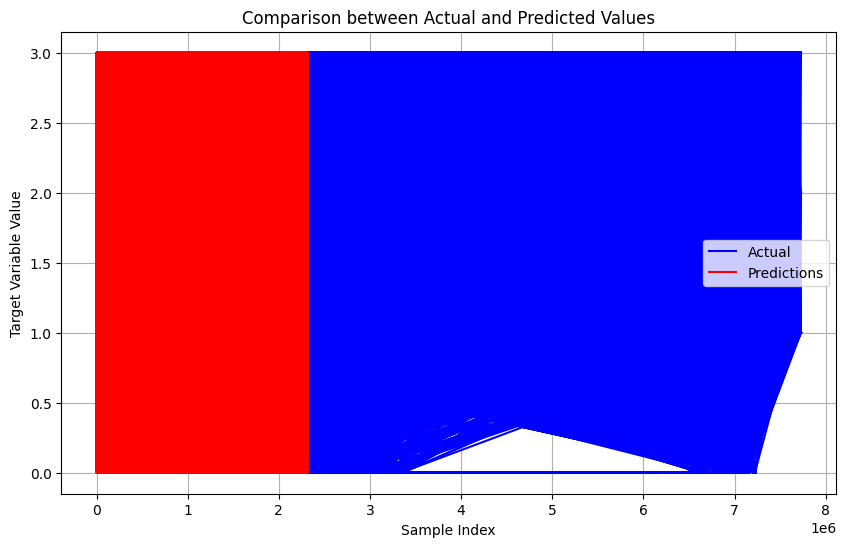

In [44]:
import matplotlib.pyplot as plt

# Increase the path chunk size
plt.rcParams['agg.path.chunksize'] = 10000  # Adjust as needed

# Get the model predictions
y_pred = grid_search.predict(X_test)

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_corrected, label='Actual', color='blue')
plt.plot(y_pred, label='Predictions', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable Value')
plt.title('Comparison between Actual and Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Accuracy on Training (GBM)

In [45]:
# Train model with best parameters
#grid_search.fit(X_train, y_train_corrected)

# Make predictions with the training set
y_train_pred = grid_search.predict(X_train)


# Calculate accuracy on training set
train_accuracy = accuracy_score(y_train_corrected, y_train_pred)

# Make predictions with the test set
y_test_pred = grid_search.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test_corrected, y_test_pred)

# Print accuracies
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Accuracy: 87.65%
Test Accuracy: 87.65%
